In [6]:
from sklearn import svm
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

In [7]:
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('..'))))
from sklearn.datasets import load_iris
data = load_iris()

该数据集测量了所有150个样本的4个特征，分别是：
- sepal length（花萼长度）
- sepal width（花萼宽度）
- petal length（花瓣长度）
- petal width（花瓣宽度）
以上四个特征的单位都是厘米（cm）。

通常使用m表示样本量的大小，n表示每个样本所具有的特征数。因此在该数据集中，m=150,n=4

In [9]:
from data.handler import MEDIA_PATH
img_floder = os.path.join(MEDIA_PATH, 'svm')

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

X = data.data  # 只包括样本的特征，150x4
y = data.target  # 样本的类型，[0, 1, 2]
features = data.feature_names  # 4个特征的名称
targets = data.target_names  # 3类鸢尾花的名称，跟y中的3个数字对应

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [12]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

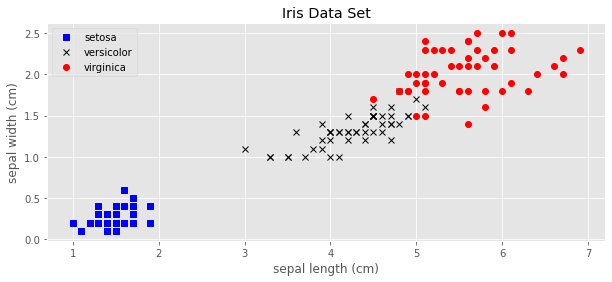

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(X[:, 2][y==0], X[:, 3][y==0], 'bs', label=targets[0])
plt.plot(X[:, 2][y==1], X[:, 3][y==1], 'kx', label=targets[1])
plt.plot(X[:, 2][y==2], X[:, 3][y==2], 'ro', label=targets[2])
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Iris Data Set')
plt.legend()
plt.savefig(os.path.join(img_floder,'Iris_Data_Set_features_=_sepal_width_height.png'), dpi=60)
plt.show()

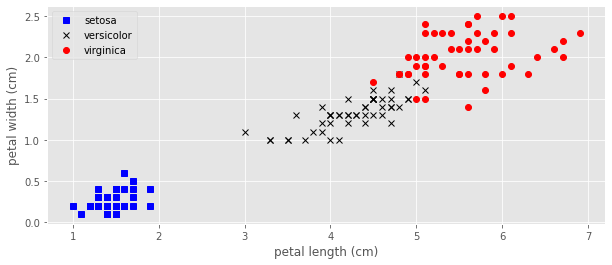

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(X[:, 2][y==0], X[:, 3][y==0], 'bs', label=targets[0])
plt.plot(X[:, 2][y==1], X[:, 3][y==1], 'kx', label=targets[1])
plt.plot(X[:, 2][y==2], X[:, 3][y==2], 'ro', label=targets[2])
plt.xlabel(features[2])
plt.ylabel(features[3])
plt.legend()
plt.savefig(os.path.join(img_floder,'Iris_Data_Set_features_=_petal_width_height.png'), dpi=60)
plt.show()

In [119]:
import numpy as np 
import pandas as pd 
# 取两组features,两个targets
all_data = pd.DataFrame(data=np.column_stack((data.data[:,:2][data.target!=2], data.target[:][data.target!=2])), columns=data.feature_names[:2]+['target'])
all_data.head()

sepal length (cm)  sepal width (cm)  target
0                5.1               3.5     0.0
1                4.9               3.0     0.0
2                4.7               3.2     0.0
3                4.6               3.1     0.0
4                5.0               3.6     0.0

In [121]:
x, y=np.split(all_data,(2,),axis=1)

In [122]:
# 用train_test_split将数据随机分为训练集和测试集，测试集占总数据的30%（test_size=0.3),random_state是随机数种子
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=1,test_size=0.3)

In [123]:
# classifier=svm.SVC(kernel='linear',gamma=0.1,decision_function_shape='ovo',C=0.1)
# kernel='linear'时，为线性核函数，C越大分类效果越好，但有可能会过拟合（defaul C=1）。
classifier=svm.SVC(kernel='rbf',gamma=0.1,decision_function_shape='ovo',C=0.8)
# kernel='rbf'（default）时，为高斯核函数，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
# decision_function_shape='ovo'时，为one v one分类问题，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。
# decision_function_shape='ovr'时，为one v rest分类问题，即一个类别与其他类别进行划分。

In [124]:
# ravel二维矩阵转一维矩阵
classifier.fit(x_train,y_train.values.ravel())

SVC(C=0.8, decision_function_shape='ovo', gamma=0.1)

In [125]:
print("SVM-输出训练集的准确率为：",classifier.score(x_train,y_train))
# 分类器预测
y_hat=classifier.predict(x_train)
print("SVM-输出测试集的准确率为：",classifier.score(x_test,y_test))

SVM-输出训练集的准确率为： 1.0
SVM-输出测试集的准确率为： 1.0


In [128]:
x1_min, x1_max = x['sepal length (cm)'].min(), x['sepal length (cm)'].max()
x2_min, x2_max = x['sepal width (cm)'].min(), x['sepal width (cm)'].max()
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点（用meshgrid函数生成两个网格矩阵X1和X2）
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点，再通过stack()函数，axis=1，生成测试点

In [92]:
grid_hat = classifier.predict(grid_test)  

In [93]:
grid_hat

array([0., 0., 0., ..., 2., 2., 2.])

In [94]:
grid_hat = grid_hat.reshape(x1.shape)

In [99]:
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

# 2.指定默认字体
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 3.绘制
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

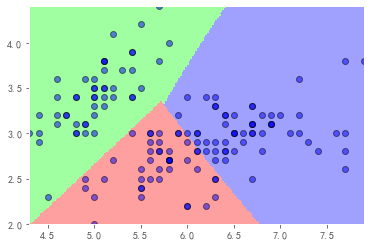

In [113]:

alpha=0.5

plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light) # 预测值的显示
# plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.plot(x.values[:, 0], x.values[:, 1], 'o', alpha=alpha, color='blue', markeredgecolor='k')
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本

In [104]:
x_test.shape

(45, 2)

In [ ]:


plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()

In [85]:
grid_test

array([[4.3      , 2.       ],
       [4.3      , 2.0120603],
       [4.3      , 2.0241206],
       ...,
       [7.9      , 4.3758794],
       [7.9      , 4.3879397],
       [7.9      , 4.4      ]])

- 方便二分类，我们取两个target:0 1
- 取两个feature： sepal length (cm) 和 sepal width (cm)

In [11]:
target_data = data.target[data.target<2]
features_data = data.data[:,0:2][data.target<2]
feature_names = data.feature_names[:2]
pd.DataFrame(data=np.column_stack((features_data, target_data)), columns=feature_names+['target']).head()

sepal length (cm)  sepal width (cm)  target
0                5.1               3.5     0.0
1                4.9               3.0     0.0
2                4.7               3.2     0.0
3                4.6               3.1     0.0
4                5.0               3.6     0.0

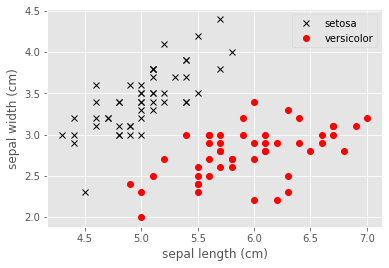

In [12]:
# plt.figure(figsize=(10, 4))
plt.plot(features_data[:, 0][target_data==0], features_data[:, 1][target_data==0], 'kx', label=data.target_names[0])
plt.plot(features_data[:, 0][target_data==1], features_data[:, 1][target_data==1], 'ro', label=data.target_names[1])
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.savefig(os.path.join(img_floder,'Iris_Data_Set_features_two_features,and.png'), dpi=60)
plt.show()

In [13]:
data_dict = {0:features_data[:, :][target_data==0],
                1:features_data[:, :][target_data==1]}

In [14]:
# 寻找超平面 W^T*x+b = 0
# 点到超平面距离为 r = |W^T*x+b|/||w||

In [15]:
def selectJrand(i:'α', m:'α参数个数'):
    """随机选择不等于i的α"""
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

In [16]:
def clipAlpha(aj:'alpha',H:'alpha上限',L:'alhpa下限'):
    """判定α是否在[L,H]，否则取边界值"""
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [17]:
def showDataSet(dataMat, labelMat):
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

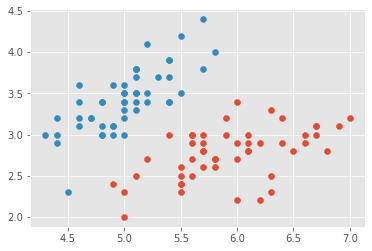

In [18]:
showDataSet(features_data, target_data)

In [19]:
import random

In [20]:
def smoSimple(dataMatIn:'features数据', classLabels:'target数据', C:'惩罚值', toler, maxIter):
    """SMO函数"""
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.m at(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0
    m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，更设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas

SyntaxError: invalid syntax (<ipython-input-20-7b930088843d>, line 5)

In [47]:
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()

In [48]:
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if target_data[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()


In [49]:
b,alphas = smoSimple(features_data,target_data, 0.6, 0.001, 40)

迭代次数: 1
迭代次数: 2
迭代次数: 3
迭代次数: 4
迭代次数: 5
迭代次数: 6
迭代次数: 7
迭代次数: 8
迭代次数: 9
迭代次数: 10
迭代次数: 11
迭代次数: 12
迭代次数: 13
迭代次数: 14
迭代次数: 15
迭代次数: 16
迭代次数: 17
迭代次数: 18
迭代次数: 19
迭代次数: 20
迭代次数: 21
迭代次数: 22
迭代次数: 23
迭代次数: 24
迭代次数: 25
迭代次数: 26
迭代次数: 27
迭代次数: 28
迭代次数: 29
迭代次数: 30
迭代次数: 31
迭代次数: 32
迭代次数: 33
迭代次数: 34
迭代次数: 35
迭代次数: 36
迭代次数: 37
迭代次数: 38
迭代次数: 39
迭代次数: 40


In [51]:
get_w(features_data, target_data, alphas)

[[0.0], [0.0]]

In [50]:
w = get_w(features_data, target_data, alphas)
showClassifer(features_data, w, b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()